## ICPA

In [4]:
if (!require("arrow")) {
    install.packages("arrow");
    library(arrow);
}

In [18]:
# read the equity_indices
df = read_parquet('../data/equity_indices.parquet')

In [19]:
df2 = df[df$Datetime >= "2008-01-01" & df$Datetime <= "2020-12-31",];

In [20]:
head(df2)

,DY,ES,EW,FX,MX,NQ,RTY,X,YM,Datetime
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2231,0,0,0,0,0,0,0,0,0.0018232415,2008-01-01 14:00:00
2232,0,0,0,0,0,0,0,0,-0.0003831418,2008-01-01 15:00:00
2233,0,0,0,0,0,0,0,0,0.0006707551,2008-01-01 16:00:00
2234,0,0,0,0,0,0,0,0,-0.0008618213,2008-01-01 17:00:00
2235,0,0,0,0,0,0,0,0,-0.0018209699,2008-01-01 18:00:00
2236,0,0,0,0,0,0,0,0,-0.0012481997,2008-01-01 19:00:00


In [21]:
tail(df2)

,DY,ES,EW,FX,MX,NQ,RTY,X,YM,Datetime
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
81755,0,5.385030e-04,1.396343e-03,0,0.0000000000,0.0005455325,8.116883e-04,0.0002341372,0.0005629885,2020-12-30 19:00:00
81756,0,-4.036598e-04,8.714977e-05,0,0.0000000000,0.0001168361,-2.534469e-04,-0.0007022472,-0.0003309834,2020-12-30 20:00:00
81757,0,-6.730381e-04,-2.222125e-03,0,0.0008268259,-0.0002336449,-1.825280e-03,-0.0053876786,-0.0007284045,2020-12-30 21:00:00
81758,0,-8.755388e-04,-2.620087e-04,0,0.0002753809,-0.0002921243,-1.168284e-03,-0.0042392840,-0.0007289354,2020-12-30 22:00:00
81759,0,-6.740816e-05,-1.048310e-03,0,0.0010094521,0.0001168839,-5.085435e-05,0.0008672343,-0.0001657880,2020-12-30 23:00:00
81760,0,1.685318e-03,0.000000e+00,0,0.0022918959,0.0007206997,2.339419e-03,0.0058290666,0.0010943822,2020-12-31 00:00:00


In [22]:
pca = prcomp(df2[,1:9])

In [23]:
pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
DY,0.2418578,-0.15191846,0.12021661,-0.60124153,-0.22713552,0.040418232,-0.26938926,0.64410537,0.042610784
ES,0.2586878,0.31235694,0.06003585,-0.07415707,0.36260502,-0.054353400,0.22684393,0.06951769,0.797297084
EW,0.2514076,0.37530831,0.13466986,0.14817941,-0.38889846,-0.744881562,-0.20963350,-0.06857349,-0.033252150
FX,0.4894846,-0.39086371,0.18890292,-0.35372511,-0.15893006,-0.028665186,0.34053674,-0.55117894,-0.031315882
MX,0.4951827,-0.45719788,0.16212079,0.60458915,0.22856325,0.009271951,-0.22463981,0.22616718,0.003353922
NQ,0.2106490,0.30686009,0.10393051,-0.22945314,0.41176139,0.207831500,-0.64786945,-0.36756472,-0.174452191
RTY,0.2907503,0.42889618,0.16304461,0.25011228,-0.49536460,0.619872689,0.10809176,0.02777285,-0.017007396
X,0.3600074,0.02296609,-0.92828051,-0.01331810,-0.07255722,0.015401615,-0.04690193,-0.01454817,-0.008482586
YM,0.2608918,0.31313059,0.05244461,-0.07085518,0.40986222,-0.109464964,0.48164125,0.29078621,-0.574116077


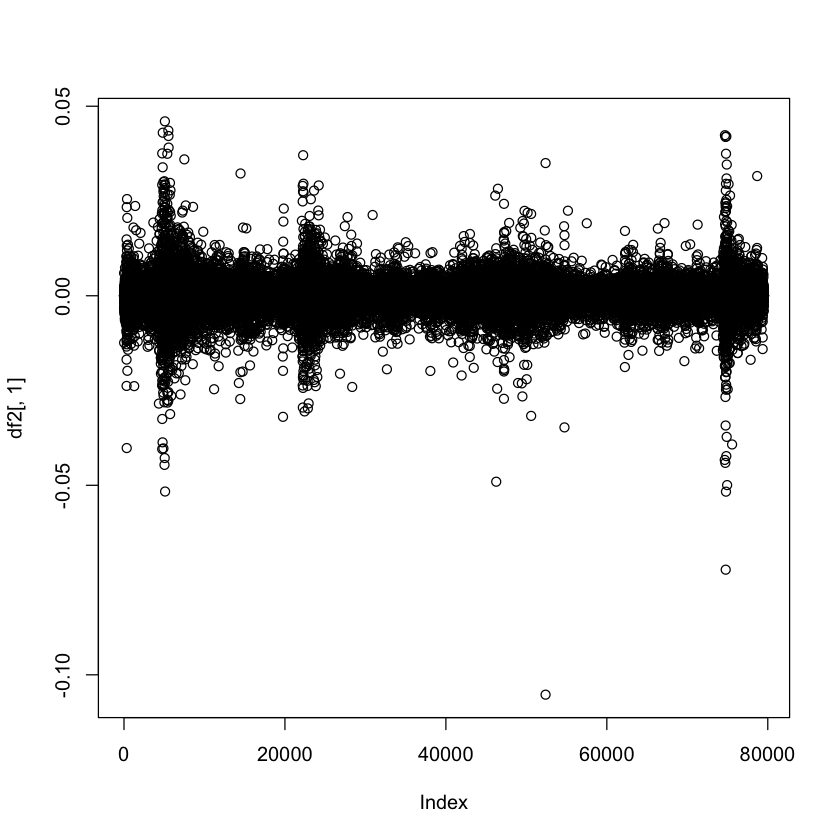

In [24]:
plot(df2[,1])

In [37]:
source("xpca.R")

In [38]:
ipca(df2[,1:9], 1e+5)

[1] 9 9
[1] 79530     9
          PC1         PC2         PC3         PC4         PC5          PC6
DY  0.2418578 -0.15191846  0.12021661 -0.60124153 -0.22713552  0.040418232
ES  0.2586878  0.31235694  0.06003585 -0.07415707  0.36260502 -0.054353400
EW  0.2514076  0.37530831  0.13466986  0.14817941 -0.38889846 -0.744881562
FX  0.4894846 -0.39086371  0.18890292 -0.35372511 -0.15893006 -0.028665186
MX  0.4951827 -0.45719788  0.16212079  0.60458915  0.22856325  0.009271951
NQ  0.2106490  0.30686009  0.10393051 -0.22945314  0.41176139  0.207831500
RTY 0.2907503  0.42889618  0.16304461  0.25011228 -0.49536460  0.619872689
X   0.3600074  0.02296609 -0.92828051 -0.01331810 -0.07255722  0.015401615
YM  0.2608918  0.31313059  0.05244461 -0.07085518  0.40986222 -0.109464964
            PC7         PC8          PC9
DY  -0.26938926  0.64410537  0.042610784
ES   0.22684393  0.06951769  0.797297084
EW  -0.20963350 -0.06857349 -0.033252150
FX   0.34053674 -0.55117894 -0.031315882
MX  -0.22463981  0.22

ERROR: Error in X %*% W: requires numeric/complex matrix/vector arguments
